# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset:

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [16]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

imdb_df = pd.read_csv('imdb_top_1000.csv')

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [17]:
imdb_df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [18]:
print(imdb_df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [19]:
imdb_df.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [20]:
# removing unnecessary columns to reduce clutter
imdb_main = imdb_df.drop(['Poster_Link', 'Certificate', 'No_of_Votes'], axis=1)




In [21]:
imdb_main.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Overview', 'Meta_score', 'Director', 'Star1', 'Star2', 'Star3',
       'Star4', 'Gross'],
      dtype='object')

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

In [22]:
# I wanted to find out if the average runtime by year has increased or decreased, but first
# I had to convert the 'Released_Year' and 'Runtime' columns to int dtypes
imdb_main.dtypes

Series_Title      object
Released_Year     object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
Gross             object
dtype: object

In [23]:
year_values = imdb_main['Released_Year'].unique()
print(year_values)

['1994' '1972' '2008' '1974' '1957' '2003' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [24]:
# I found a single row with a non-numerical value for the 'Released_Year' column, so I updated it

print(imdb_main[imdb_main['Released_Year'] == 'PG'])

    Series_Title Released_Year  Runtime                      Genre  \
966    Apollo 13            PG  140 min  Adventure, Drama, History   

     IMDB_Rating                                           Overview  \
966          7.6  NASA must devise a strategy to return Apollo 1...   

     Meta_score    Director      Star1        Star2        Star3        Star4  \
966        77.0  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

           Gross  
966  173,837,933  


In [25]:
imdb_main.loc[imdb_main['Released_Year'] == 'PG', 'Released_Year'] = '1995'

In [26]:
# I am now able to convert both columns into an int
imdb_main['Released_Year'] = imdb_main['Released_Year'].astype(int)
imdb_main['Runtime'] = imdb_main['Runtime'].str.replace(' min', '').astype(int)

imdb_main.dtypes

Series_Title      object
Released_Year      int32
Runtime            int32
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
Gross             object
dtype: object

In [27]:
yearly_avg_runtime = imdb_main.groupby('Released_Year').agg({'Runtime': 'mean'}).reset_index()
yearly_avg_runtime

,Released_Year,Runtime
0,1920,76.000000
1,1921,68.000000
2,1922,94.000000
3,1924,45.000000
4,1925,85.000000
...,...,...
94,2016,123.642857
95,2017,121.590909
96,2018,128.105263
97,2019,132.130435


<function matplotlib.pyplot.show(close=None, block=None)>

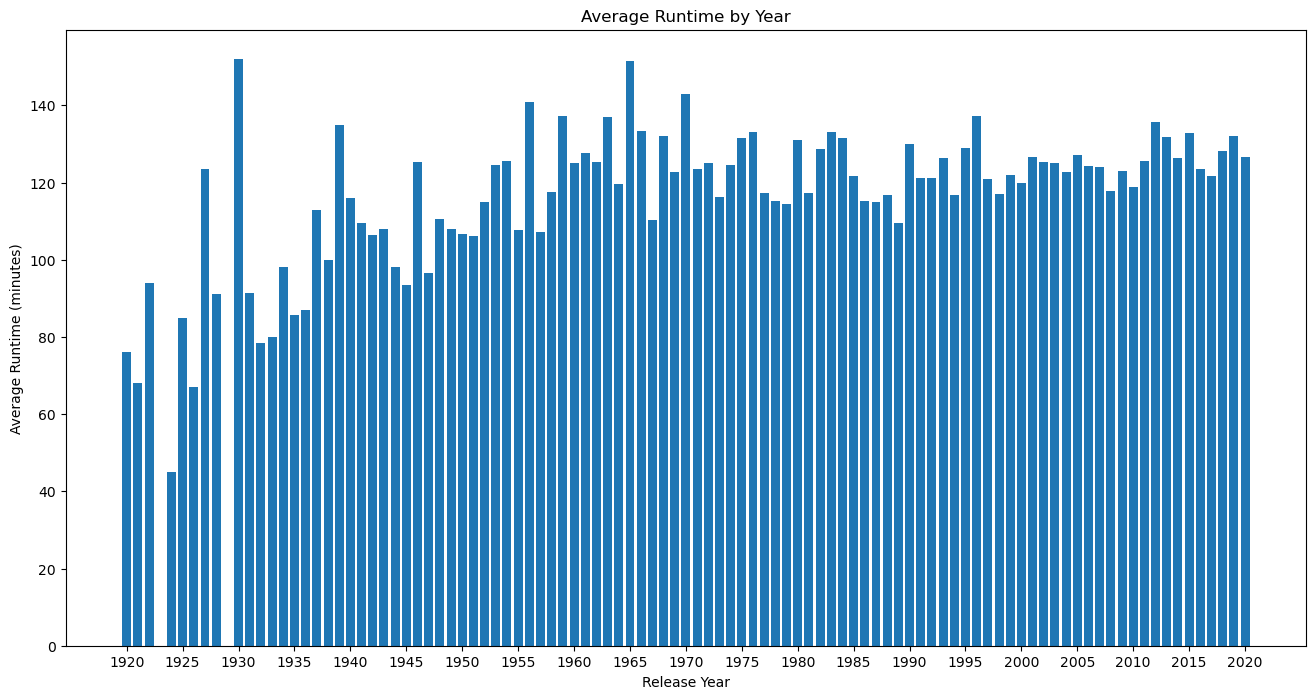

In [28]:
plt.figure(figsize=(16, 8))

plt.bar(yearly_avg_runtime['Released_Year'], yearly_avg_runtime['Runtime'])

plt.xticks(range(1920, 2021, 5))

plt.title('Average Runtime by Year')
plt.xlabel('Release Year')
plt.ylabel('Average Runtime (minutes)')

plt.show

In [29]:
# I wanted to see the overall average runtime for all movies
overall_avg_runtime = imdb_main['Runtime'].mean()
overall_avg_runtime

122.891

In [30]:
# I would like to see the which directors had more than 4 films on this dataset, and include 
# the genres of those films by it's (primary) listed genre value to see the range of their works
imdb_main['Primary_Genre'] = imdb_main['Genre'].str.split(',').str[0]


dir_counts = imdb_main['Director'].value_counts()

# Filtering out directors with less than 4 films in dataset
directors_filter = dir_counts[dir_counts > 4].index.tolist()

# Applying filter to original dataframe and organize the newly created data frame
filtered_directors = imdb_main[imdb_main['Director'].isin(directors_filter)]

target_directors = filtered_directors[['Director', 'Series_Title', 'Released_Year', 'Primary_Genre']]
target_directors

target_directors.to_csv('target_directors.csv')



In [31]:
ax = pivot.plot(kind='bar', stacked=True, color=['red', 'orange', 'pink', 'yellow', 'green', 'cyan', 'blue', 'gray', 'black', 'purple', 'brown', 'olive'], figsize=(12,6))

ax.set_xlabel('Director')
ax.set_ylabel('Number of Series Titles')
ax.set_title('Number of Series Titles by Director and Primary Genre')
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()


NameError: name 'pivot' is not defined

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 

    - As someone into from all over the world and time periods, I was surprised to find directors in the final filter that I wasn't familiar with, and now I'd like to explore their filmography.
    
    - I also anticipated there to be greater disparancies in runtime throughout the years, but found out that the runtimes were fairly consistent, save for the early 1900s when film was a new medium and film was much more expensive!


2. Do you have any concerns about your dataset?

    - I wish there was a production cost column to delve into how a budgets correlate to ratings and box office returns. I think it's important to be able to tell whether or not once needs a huge investment for a great work of art.



3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

    - Keeping in mind that with even larger datasets, I may not be able to go back and fix values like I was able to with 'Released_Year'. I am going to have to make a decision whether or not to remove the value, or row all together.